In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os


In [18]:
# read 4T10xx.mat data
#file_path = r".\4tone_cell\4T1006.mat"
file_path = r"Z:\projects\trial_classification\4tone_cell\4T1002.mat"
file = h5py.File(file_path, 'r')

filename = os.path.basename(file.filename)  

# print content to see what the data the mat file has
print(list(file.keys()))
ffr_nodss = file["ffr_nodss"][:] 
labels = file["labels"][:]
time = file["time"][:]
print("labels: ", labels.shape)
print("nodss:", ffr_nodss.shape)
print("time: ", time.shape)

['#refs#', 'ffr_dss', 'ffr_nodss', 'labels', 'time']
labels:  (1, 4086)
nodss: (4086, 4997)
time:  (1, 4997)


In [19]:
# convert all HDF5 references to integers
labels = np.array([
    int(file[ref][()].tobytes().decode('ascii').strip('\x00'))
    for ref in labels[0]  # iterate over the row
])


ffr_nodss = file['ffr_nodss'][:]
time = file['time'][:].flatten()
tone1_idx = np.where(labels == 1)[0]
tone1_traces = ffr_nodss[tone1_idx, :]


In [20]:
#trim data
xmin, xmax = 50, 250  # desired time window in ms
xmin_idx = np.argmin(np.abs(time - xmin))
xmax_idx = np.argmin(np.abs(time - xmax))

ffr_trimmed = ffr_nodss[:, xmin_idx:xmax_idx]
time_trimmed = time[xmin_idx:xmax_idx]

print(f"Trimmed data shape: {ffr_trimmed.shape}")
print(f"Trimmed time range: {time_trimmed[0]:.2f} – {time_trimmed[-1]:.2f} ms")

Trimmed data shape: (4086, 3277)
Trimmed time range: 49.99 – 249.94 ms


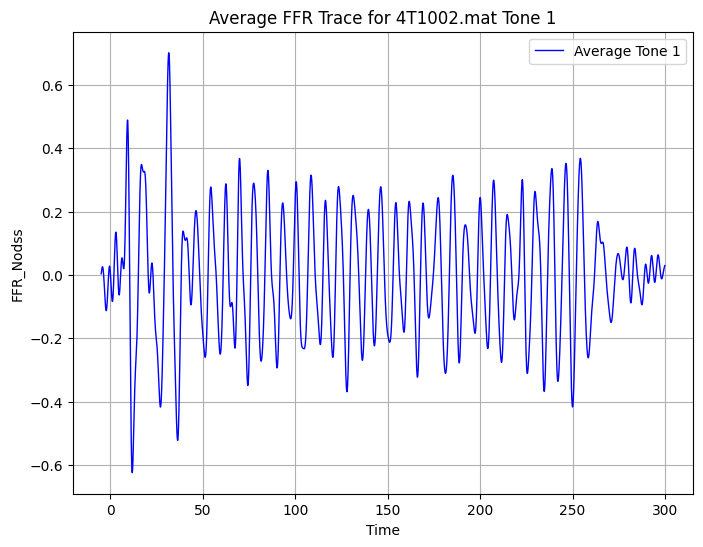

In [21]:
#Tone 1 average plot
tone1_idx = np.where(labels == 1)[0]  
tone1_traces = ffr_nodss[tone1_idx, :]  
tone1_avg = np.mean(tone1_traces, axis=0)  
plt.figure(figsize=(8, 6))
plt.plot(time, tone1_avg, color='Blue', linewidth=1, label='Average Tone 1')

plt.xlabel('Time')
plt.ylabel('FFR_Nodss')
plt.title(f'Average FFR Trace for {filename} Tone 1')
plt.grid(True)
plt.legend()
plt.show()


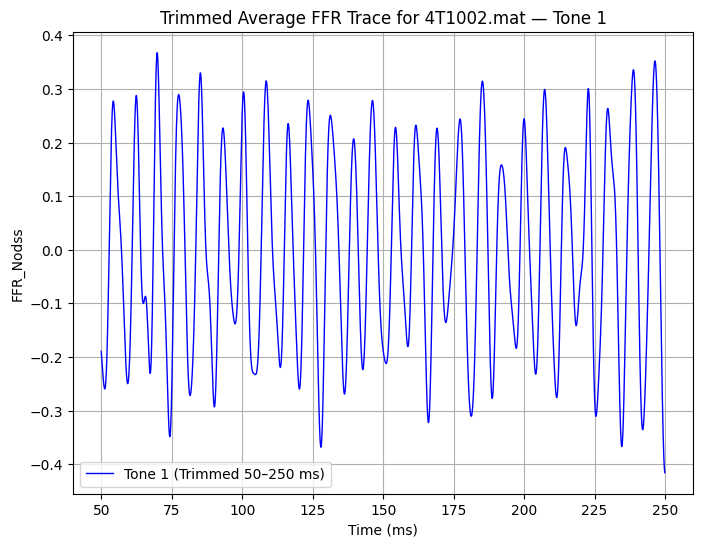

In [22]:
#after trim
tone1_traces_trimmed = ffr_trimmed[tone1_idx, :]
tone1_avg_after = np.mean(tone1_traces_trimmed, axis=0)
plt.figure(figsize=(8, 6))
plt.plot(time_trimmed, tone1_avg_after, color='blue', linewidth=1, label='Tone 1 (Trimmed 50–250 ms)')
plt.xlabel('Time (ms)')
plt.ylabel('FFR_Nodss')
plt.title(f'Trimmed Average FFR Trace for {filename} — Tone 1')
plt.grid(True)
plt.legend()
plt.show()

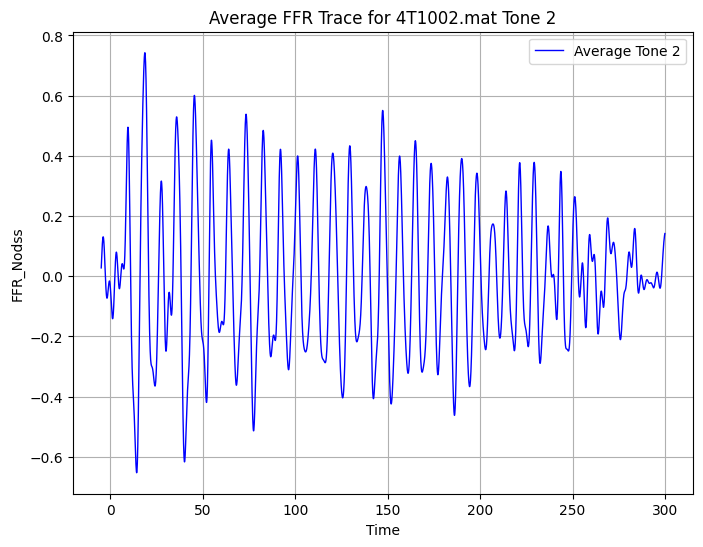

In [23]:
#Tone 2 average plot
tone2_idx = np.where(labels == 2)[0]  
tone2_traces = ffr_nodss[tone2_idx, :]  
tone2_avg = np.mean(tone2_traces, axis=0)  
plt.figure(figsize=(8, 6))
plt.plot(time, tone2_avg, color='Blue', linewidth=1, label='Average Tone 2')

plt.xlabel('Time')
plt.ylabel('FFR_Nodss')
plt.title(f'Average FFR Trace for {filename} Tone 2')
plt.grid(True)
plt.legend()
plt.show()

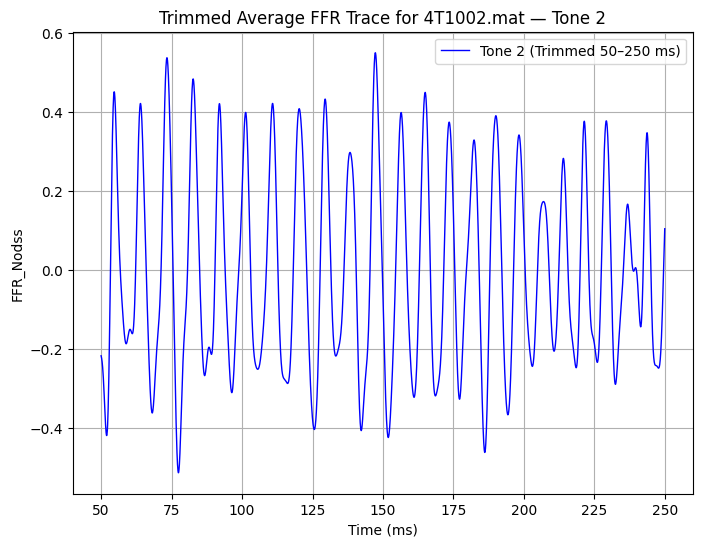

In [24]:
#after trim
tone2_traces_trimmed = ffr_trimmed[tone2_idx, :]
tone2_avg_after = np.mean(tone2_traces_trimmed, axis=0)
plt.figure(figsize=(8, 6))
plt.plot(time_trimmed, tone2_avg_after, color='blue', linewidth=1, label='Tone 2 (Trimmed 50–250 ms)')
plt.xlabel('Time (ms)')
plt.ylabel('FFR_Nodss')
plt.title(f'Trimmed Average FFR Trace for {filename} — Tone 2')
plt.grid(True)
plt.legend()
plt.show()

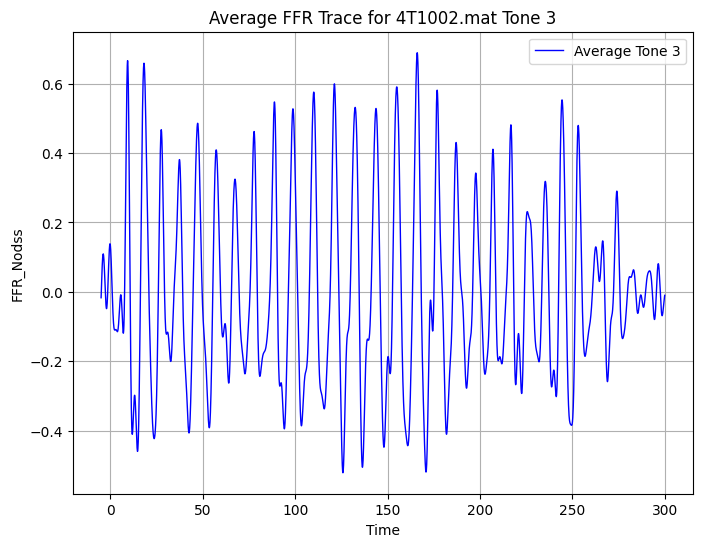

In [25]:
#Tone 3 average plot
#Tone 3
tone3_idx = np.where(labels == 3)[0]  
tone3_traces = ffr_nodss[tone3_idx, :]  
tone3_avg = np.mean(tone3_traces, axis=0)  
plt.figure(figsize=(8, 6))
plt.plot(time, tone3_avg, color='Blue', linewidth=1, label='Average Tone 3')

plt.xlabel('Time')
plt.ylabel('FFR_Nodss')
plt.title(f'Average FFR Trace for {filename} Tone 3')
plt.grid(True)
plt.legend()
plt.show()

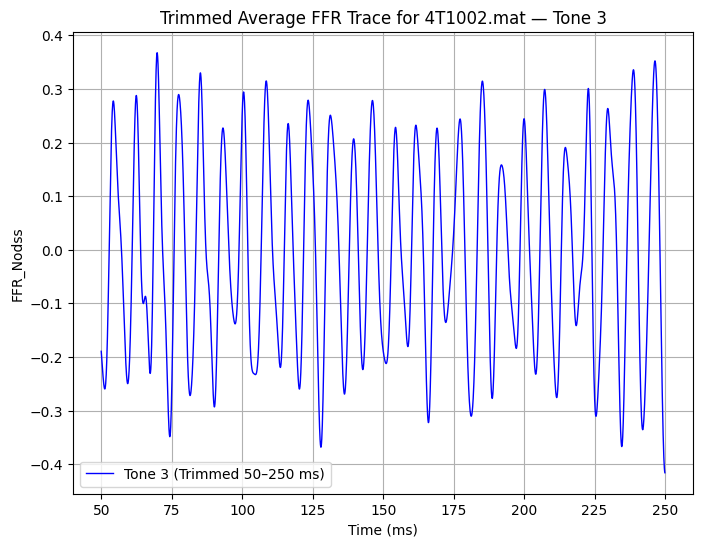

In [26]:
#after trim
tone3_traces_trimmed = ffr_trimmed[tone3_idx, :]
tone3_avg_after = np.mean(tone1_traces_trimmed, axis=0)
plt.figure(figsize=(8, 6))
plt.plot(time_trimmed, tone3_avg_after, color='blue', linewidth=1, label='Tone 3 (Trimmed 50–250 ms)')
plt.xlabel('Time (ms)')
plt.ylabel('FFR_Nodss')
plt.title(f'Trimmed Average FFR Trace for {filename} — Tone 3')
plt.grid(True)
plt.legend()
plt.show()

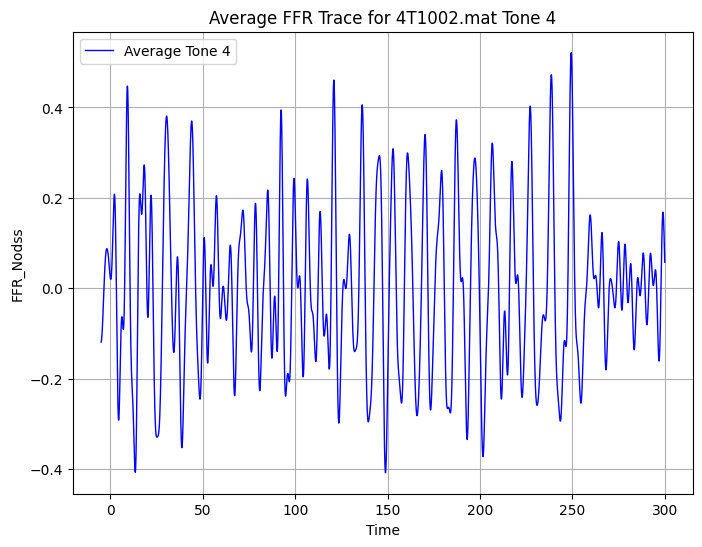

In [27]:
#Tone 4 average plot
tone4_idx = np.where(labels == 4)[0]  
tone4_traces = ffr_nodss[tone4_idx, :]  
tone4_avg = np.mean(tone4_traces, axis=0)  
plt.figure(figsize=(8, 6))
plt.plot(time, tone4_avg, color='Blue', linewidth=1, label='Average Tone 4')

plt.xlabel('Time')
plt.ylabel('FFR_Nodss')
plt.title(f'Average FFR Trace for {filename} Tone 4')
plt.grid(True)
plt.legend()
plt.show()

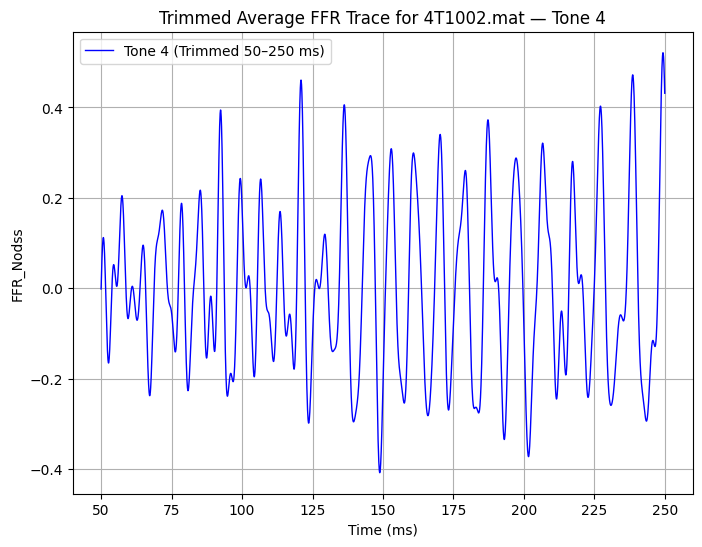

In [28]:
#after trim
tone4_traces_trimmed = ffr_trimmed[tone4_idx, :]
tone4_avg_after = np.mean(tone4_traces_trimmed, axis=0)
plt.figure(figsize=(8, 6))
plt.plot(time_trimmed, tone4_avg_after, color='blue', linewidth=1, label='Tone 4 (Trimmed 50–250 ms)')
plt.xlabel('Time (ms)')
plt.ylabel('FFR_Nodss')
plt.title(f'Trimmed Average FFR Trace for {filename} — Tone 4')
plt.grid(True)
plt.legend()
plt.show()